In [2]:
import sklearn
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

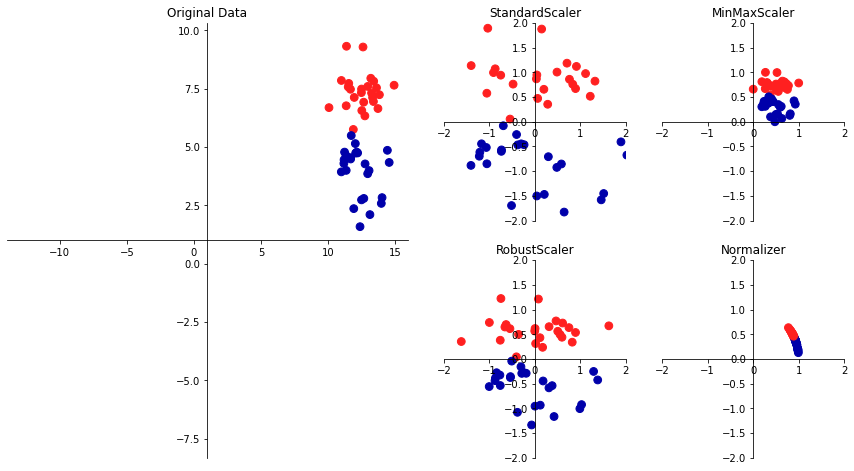

In [3]:
mglearn.plots.plot_scaling()

In [4]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
np.set_printoptions(suppress=True)
print(f"Transformed shape: {X_train.shape}")
print(f"Per feature min before scaling: {X_train.min(axis=0)}")
print(f"Per feature max before scaling: {X_train.max(axis=0)}")
print(f"Per feature min after scaling: {X_train_scaled.min(axis=0)}")
print(f"Per feature max after scaling: {X_train_scaled.max(axis=0)}")

Transformed shape: (426, 30)
Per feature min before scaling: [  6.981       9.71       43.79      143.5         0.05263     0.01938
   0.          0.          0.106       0.05024     0.1153      0.3602
   0.757       6.802       0.001713    0.002252    0.          0.
   0.009539    0.0008948   7.93       12.02       50.41      185.2
   0.07117     0.02729     0.          0.          0.1566      0.05521  ]
Per feature max before scaling: [  28.11      39.28     188.5     2501.         0.1634     0.2867
    0.4268     0.2012     0.304      0.09575    2.873      4.885
   21.98     542.2        0.03113    0.1354     0.396      0.05279
    0.06146    0.02984   36.04      49.54     251.2     4254.
    0.2226     0.9379     1.17       0.291      0.5774     0.1486 ]
Per feature min after scaling: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Per feature max after scaling: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.

In [6]:
X_test_scaled=scaler.transform(X_test)
np.set_printoptions(suppress=True,precision=4)
print(f"Per feature min after scaling: {X_test_scaled.min(axis=0)}")
print(f"Per feature max after scaling: {X_test_scaled.max(axis=0)}")

Per feature min after scaling: [ 0.0336  0.0227  0.0314  0.0114  0.1413  0.0441  0.      0.      0.154
 -0.0062 -0.0014  0.0059  0.0043  0.0008  0.0392  0.0112  0.      0.
 -0.0319  0.0066  0.0266  0.0581  0.0203  0.0094  0.1094  0.0264  0.
  0.     -0.0002 -0.0018]
Per feature max after scaling: [0.9579 0.815  0.9558 0.8935 0.8113 1.2196 0.8796 0.9334 0.9323 1.0371
 0.4267 0.4977 0.4412 0.2837 0.487  0.7386 0.7672 0.6293 1.3369 0.3906
 0.8961 0.7932 0.8486 0.7449 0.9155 1.1319 1.0701 0.9237 1.2053 1.6307]


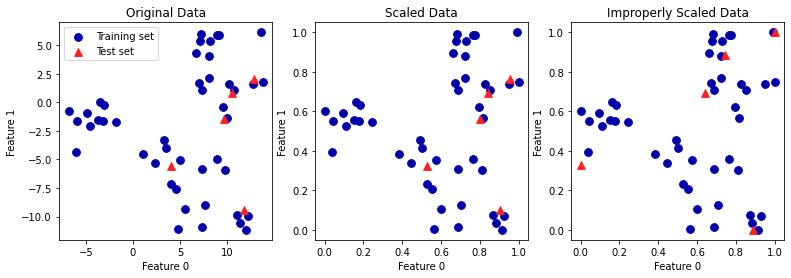

In [7]:
from sklearn.datasets import make_blobs
X,_ = make_blobs(n_samples=50,centers=5,random_state=4,cluster_std=2)
X_train,X_test=train_test_split(X,random_state=5,test_size=.1)
fig,axes=plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],color=mglearn.cm2(0),label="Training set",s=60)
axes[0].scatter(X_test[:,0],X_test[:,1],marker="^",color=mglearn.cm2(1),label="Test set",s=60)
axes[0].legend(loc="upper left")
axes[0].set_title("Original Data")

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],color=mglearn.cm2(0),label="Training set",s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],marker="^",color=mglearn.cm2(1),label="Test set",s=60)
axes[1].set_title("Scaled Data")



test_scaler=MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly=test_scaler.transform(X_test)
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],color=mglearn.cm2(0),label="Training set",s=60)
axes[2].scatter(X_test_scaled_badly[:,0],X_test_scaled_badly[:,1],marker="^",color=mglearn.cm2(1),label="Test set",s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

In [8]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
svm=SVC(C=100)
svm.fit(X_train,y_train)
print(f"Test set accuracy: {svm.score(X_test,y_test)}")

Test set accuracy: 0.9440559440559441


In [9]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
svm.fit(X_train_scaled,y_train)
print(f"Test set accuracy: {svm.score(X_test_scaled,y_test)}")

Test set accuracy: 0.965034965034965


In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
svm.fit(X_train_scaled,y_train)
print(f"Test set accuracy: {svm.score(X_test_scaled,y_test)}")

Test set accuracy: 0.958041958041958


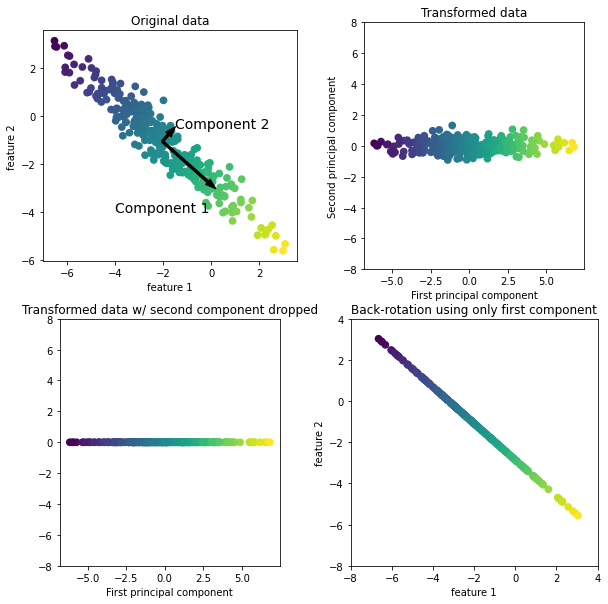

In [11]:
mglearn.plots.plot_pca_illustration()

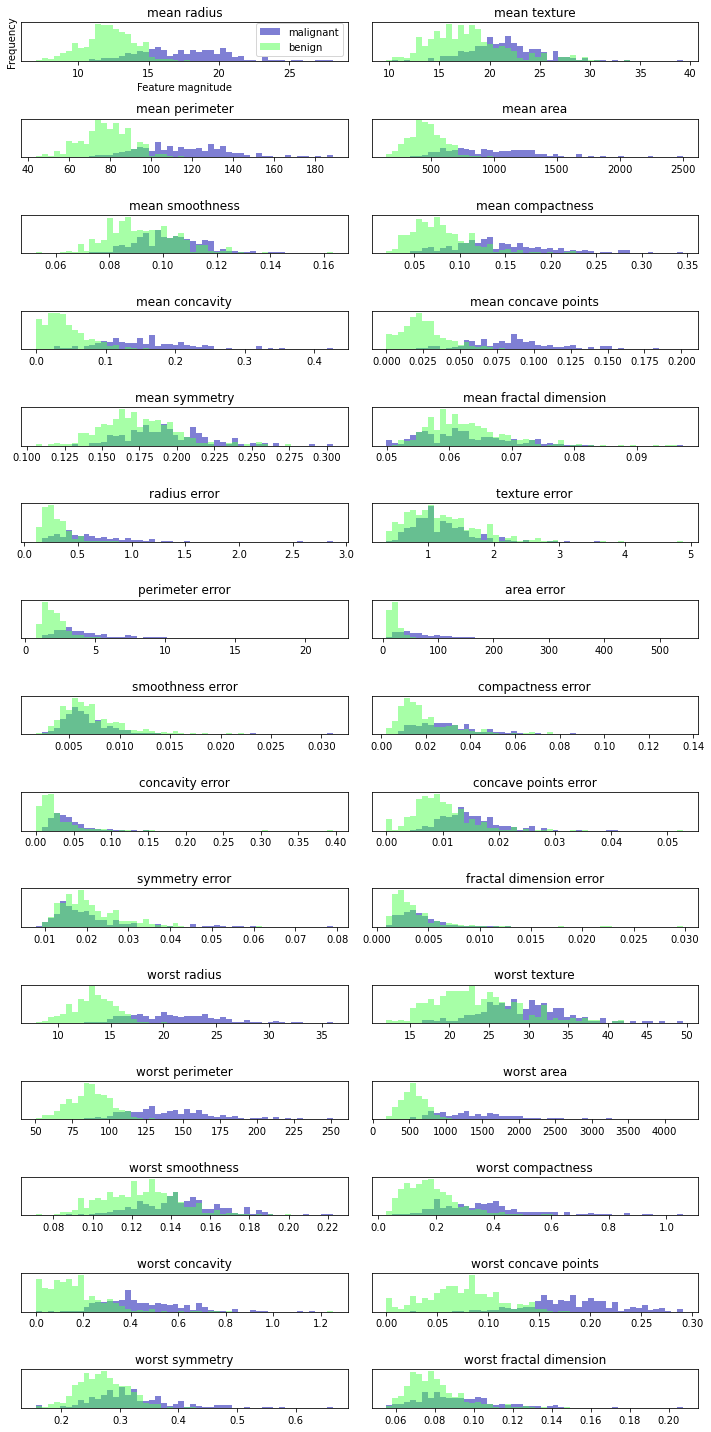

In [12]:
 cancer=load_breast_cancer()
fig,axes=plt.subplots(15,2,figsize=(10,20))
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]
ax=axes.ravel()
for i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel('Frequency')
ax[0].legend(["malignant","benign"],loc="best")
fig.tight_layout()

In [13]:
from sklearn.preprocessing import StandardScaler
cancer=load_breast_cancer()
scaler=StandardScaler()
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)

In [14]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_scaled)

X_pca=pca.transform(X_scaled)
print(f"Original shape: {str(X_scaled.shape)}")
print(f"Reduced shape: {str(X_pca.shape)}")

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

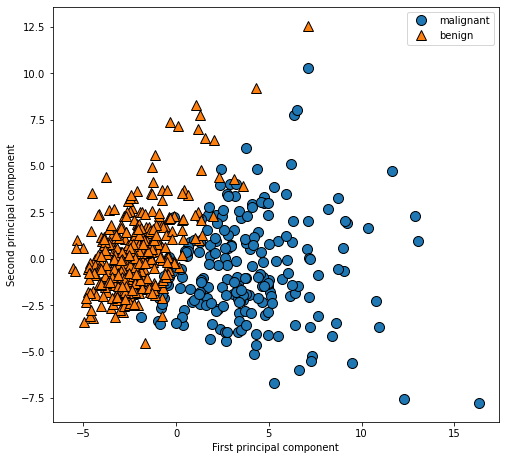

In [15]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(cancer.target_names,loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [16]:
print(f"PCA component shape: {pca.components_.shape}")

PCA component shape: (2, 30)


In [17]:
np.set_printoptions(precision=3)
print(f"PCA component shape: {pca.components_}")

PCA component shape: [[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


([<matplotlib.axis.XTick at 0x1769e6275c8>,
 [Text(0, 1, 'mean radius'),
  Text(1, 1, 'mean texture'),
  Text(2, 1, 'mean perimeter'),
  Text(3, 1, 'mean area'),
  Text(4, 1, 'mean smoothness'),
  Text(5, 1, 'mean compactness'),
  Text(6, 1, 'mean concavity'),
  Text(7, 1, 'mean concave points'),
  Text(8, 1, 'mean symmetry'),
  Text(9, 1, 'mean fractal dimension'),
  Text(10, 1, 'radius error'),
  Text(11, 1, 'texture error'),
  Text(12, 1, 'perimeter error'),
  Text(13, 1, 'area error'),
  Text(14, 1, 'smoothness error'),
  Text(15, 1, 'compactness error'),
  Text(16, 1, 'concavity error'),
  Text(17, 1, 'concave points error'),
  Text(18, 1, 'symmetry error'),
  Text(19, 1, 'fractal dimension error'),
  Text(20, 1, 'worst radius'),
  Text(21, 1, 'worst texture'),
  Text(22, 1, 'worst perimeter'),
  Text(23, 1, 'worst area'),
  Text(24, 1, 'worst smoothness'),
  Text(25, 1, 'worst compactness'),
  Text(26, 1, 'worst concavity'),
  Text(27, 1, 'worst concave points'),
  Text(28, 1, 'w

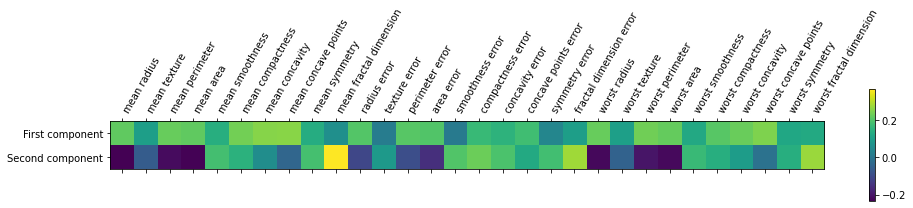

In [18]:
plt.matshow(pca.components_,cmap="viridis")
plt.yticks([0,1],["First component","Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha="left")

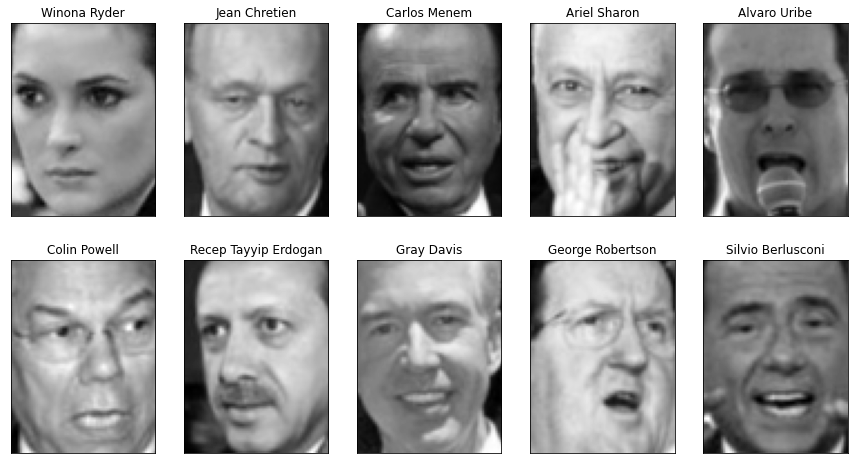

In [19]:
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape=people.images[0].shape
fix,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={"xticks":(),"yticks":()})
for target, image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image,cmap="gray")
    ax.set_title(people.target_names[target])

In [20]:
print(f"people.images.shape: {people.images.shape}")
print(f"Number of classes: {len(people.target_names)}")

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [21]:
counts=np.bincount(people.target)
for i, (count,name) in enumerate(zip(counts,people.target_names)):
    print("{0:25} {1:3}".format(name,count),end="     ")
    if (i+1)%3==0:
        print()

Alejandro Toledo           39     Alvaro Uribe               35     Amelie Mauresmo            21     
Andre Agassi               36     Angelina Jolie             20     Ariel Sharon               77     
Arnold Schwarzenegger      42     Atal Bihari Vajpayee       24     Bill Clinton               29     
Carlos Menem               21     Colin Powell              236     David Beckham              31     
Donald Rumsfeld           121     George Robertson           22     George W Bush             530     
Gerhard Schroeder         109     Gloria Macapagal Arroyo    44     Gray Davis                 26     
Guillermo Coria            30     Hamid Karzai               22     Hans Blix                  39     
Hugo Chavez                71     Igor Ivanov                20     Jack Straw                 28     
Jacques Chirac             52     Jean Chretien              55     Jennifer Aniston           21     
Jennifer Capriati          42     Jennifer Lopez             21     Jerem

In [22]:
mask=np.zeros(people.target.shape,dtype="bool")
print(people.target.shape)
print(counts)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1

X_people=people.data[mask]
y_people=people.target[mask]

X_people=X_people/255


(3023,)
[ 39  35  21  36  20  77  42  24  29  21 236  31 121  22 530 109  44  26
  30  22  39  71  20  28  52  55  21  42  21  24  20  53  31  23  28  60
  32  41  22  41  48  29  33  20  22  37  20  22  30  27  32  26  23  52
  33  23  25  33 144  32  49  24]


In [23]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=0)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test,y_test)))

Test set score of 1-nn: 0.23


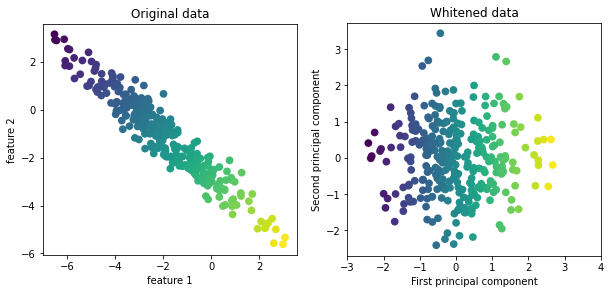

In [24]:
mglearn.plots.plot_pca_whitening()

In [25]:
pca=PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [26]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca,y_test)))

Test set accuracy: 0.31


In [27]:
print("pca.components_.shape: {}".format(pca.components_.shape))


pca.components_.shape: (100, 5655)


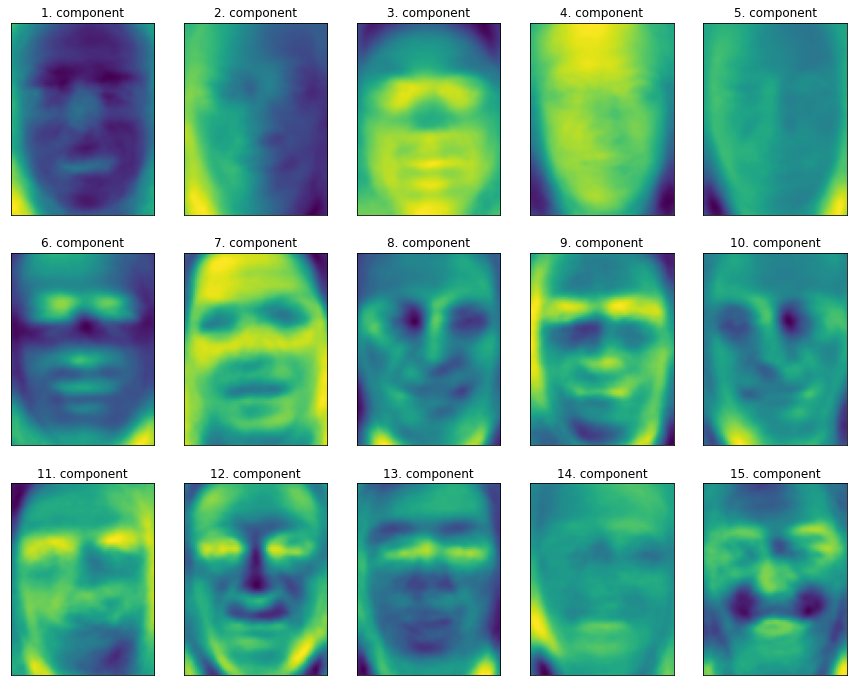

In [28]:
fix,axes=plt.subplots(3,5,figsize=(15,12), subplot_kw={"xticks":(),"yticks": ()})
for i, (component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap="viridis")
    ax.set_title("{}. component".format((i+1)))

Text(0, 0.5, 'Second principal component')

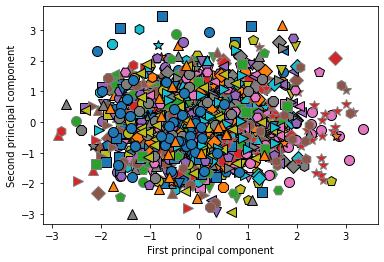

In [29]:
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1],y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

C:\Users\Daniel\anaconda3\envs\py37ml\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\Daniel\anaconda3\envs\py37ml\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


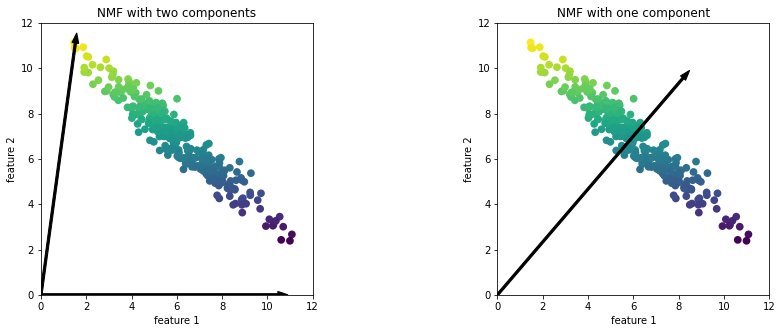

In [30]:
mglearn.plots.plot_nmf_illustration()

X_test.shape: (516, 5655)
X_test_nmf.shape: (516, 15)


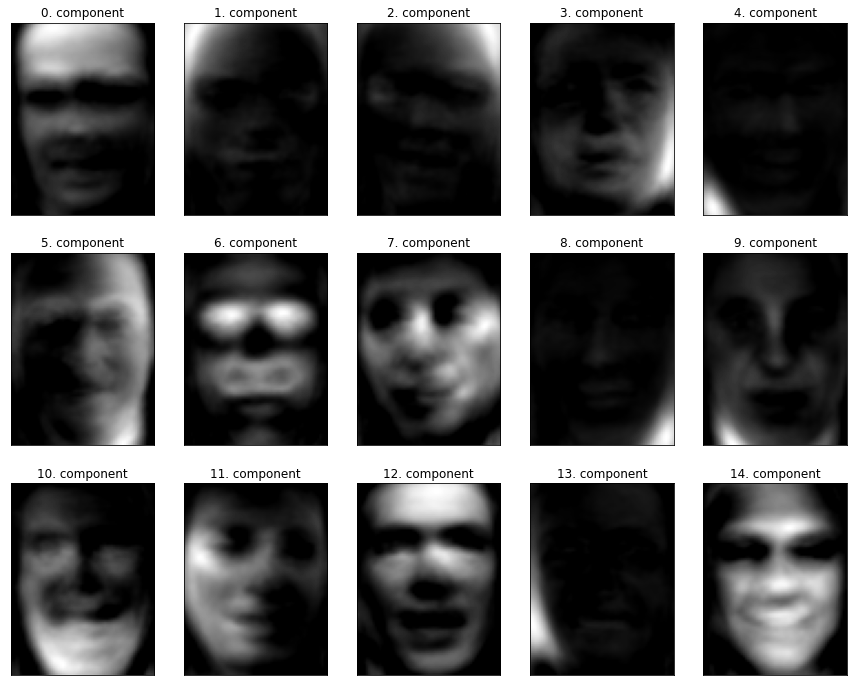

In [31]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=15,random_state=0,max_iter=10000)
nmf.fit(X_train)
X_train_nmf=nmf.transform(X_train)
X_test_nmf=nmf.transform(X_test)
print(f"X_test.shape: {X_test.shape}\nX_test_nmf.shape: {X_test_nmf.shape}")
fix,axes=plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i , (component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap="gray")
    ax.set_title(f"{i}. component")

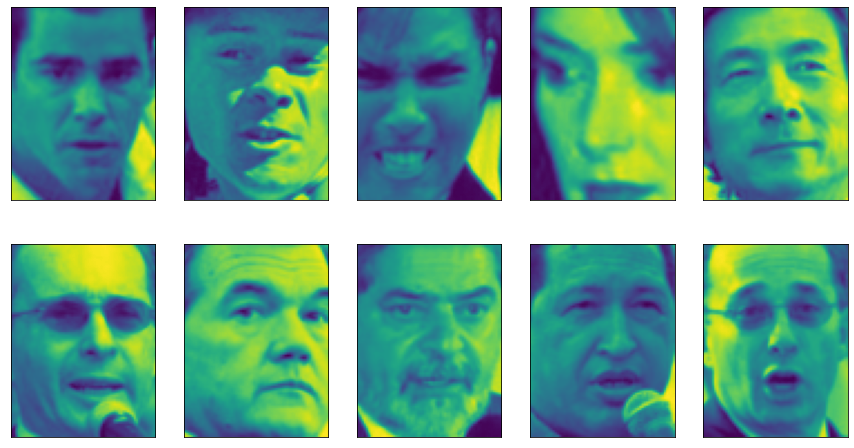

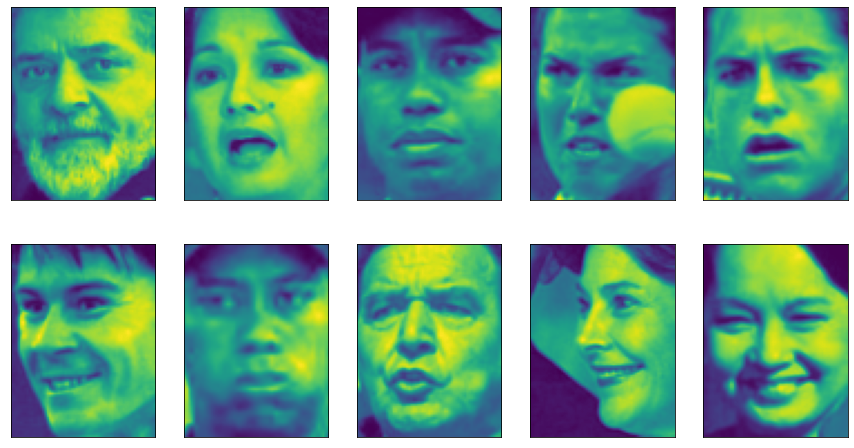

In [32]:
compn=3
inds=np.argsort(X_train_nmf[:,compn])[::-1]
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for i, (ind,ax)in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn=7
inds=np.argsort(X_train_nmf[:,compn])[::-1]
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for i, (ind,ax)in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))


(2000, 3)


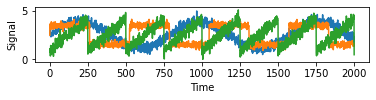

In [33]:
S=mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel("Time")
plt.ylabel("Signal")
print(S.shape)

In [34]:
A=np.random.RandomState(0).uniform(size=(100,3))
X=np.dot(S,A.T)
print("Shape of measurements: {}".format(X.shape))
print(A.shape)

Shape of measurements: (2000, 100)
(100, 3)


In [35]:
nmf=NMF(n_components=3,random_state=42,max_iter=10000)
S_=nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [36]:
pca=PCA(n_components=3)
H=pca.fit_transform(X)

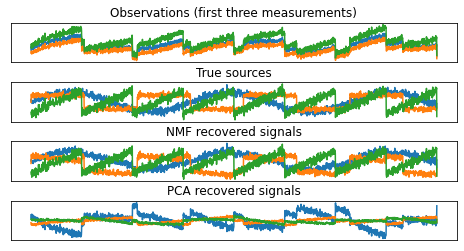

In [37]:
models=[X,S,S_,H]
names=["Observations (first three measurements)",
      "True sources",
      'NMF recovered signals',
      'PCA recovered signals']
fig,axes=plt.subplots(4,figsize=(8,4),gridspec_kw={'hspace':.5}, 
                      subplot_kw={'xticks':(),'yticks':()})
for model, name,ax in zip(models,names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')

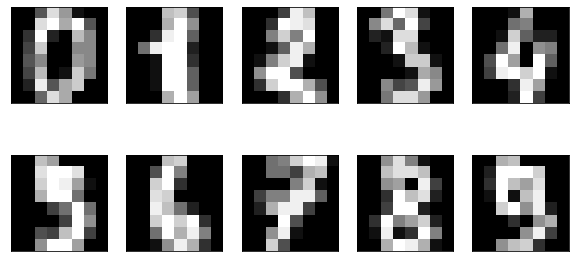

In [38]:
from sklearn.datasets import load_digits
digits=load_digits()
fig,axes=plt.subplots(2,5,figsize=(10,5),subplot_kw={"xticks":(),"yticks":()})
for ax,img in zip(axes.ravel(),digits.images):
    ax.imshow(img,cmap="gray")

(1797, 2)


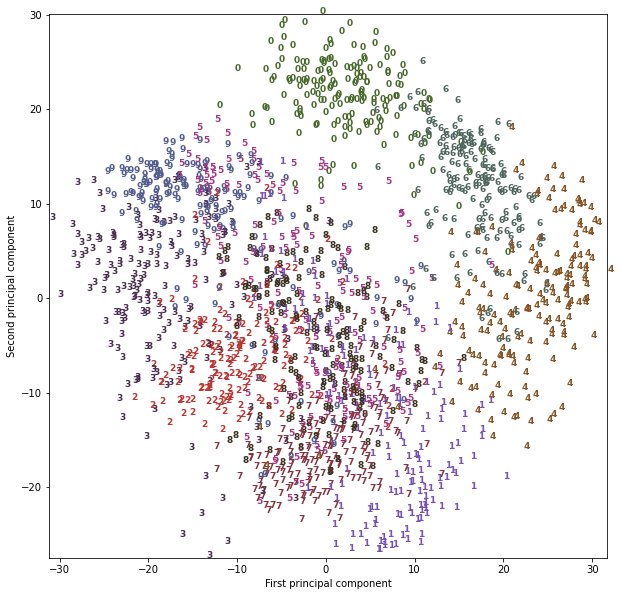

In [39]:
pca=PCA(n_components=2)
pca.fit(digits.data)
digits_pca=pca.transform(digits.data)
print(digits_pca.shape)
colors = np.array(["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
 "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"])
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i]),
           color=colors[digits.target[i]], fontdict={"weight":"bold","size":9})

    
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

In [40]:
from sklearn.manifold import TSNE
tsne=TSNE(random_state=42)
digits_tsne=tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

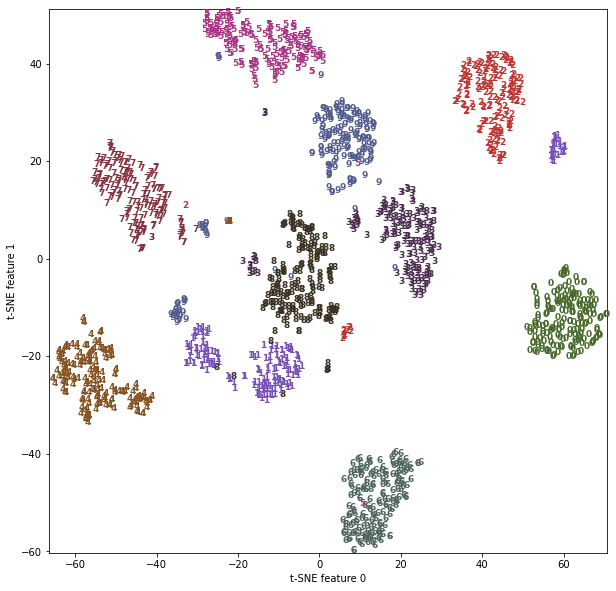

In [41]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0],digits_tsne[i,1],str(digits.target[i]),
            color=colors[digits.target[i]],fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

In [42]:
digits.data.shape

(1797, 64)

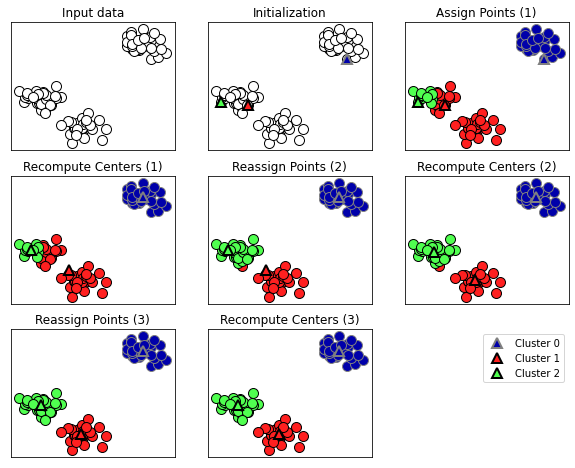

In [43]:
mglearn.plots.plot_kmeans_algorithm()

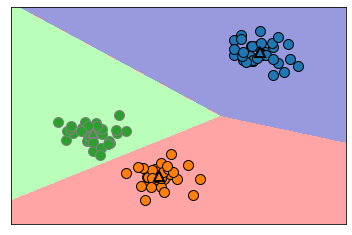

In [44]:
mglearn.plots.plot_kmeans_boundaries()

In [45]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X,y = make_blobs(random_state=1)
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


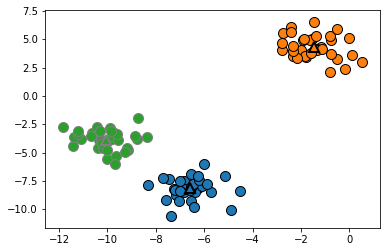

In [46]:
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers="o")
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],
                        markers="^",markeredgewidth=2)

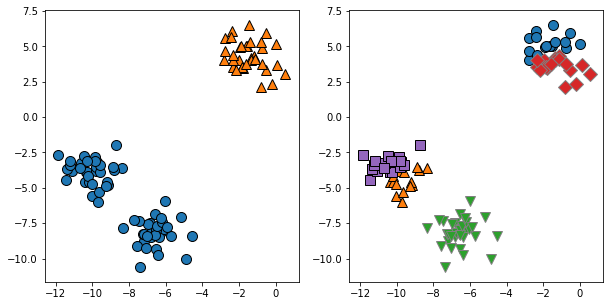

In [47]:
fig,axes=plt.subplots(1,2,figsize=(10,5))

kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
assignments=kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[0])

kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
assignments=kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[1])

Text(0.5, 0, 'Feature 1')

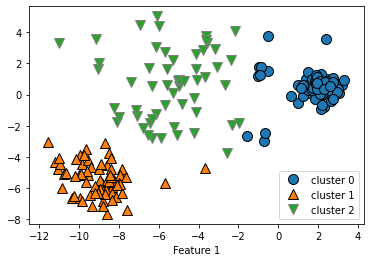

In [48]:
X_varied,y_varied=make_blobs(n_samples=200, cluster_std=[1.0,2.5,0.5],
                            random_state=170)
y_pred=KMeans(n_clusters=3,random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0],X_varied[:,1],y_pred)
plt.legend(["cluster 0","cluster 1","cluster 2"],loc="best")
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")

Text(0.5, 0, 'Feature 1')

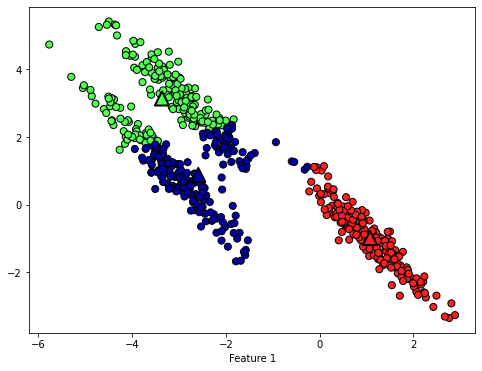

In [49]:
X,y=make_blobs(random_state=170,n_samples=600)
rng=np.random.RandomState(74)
transformation=rng.normal(size=(2,2))
X=np.dot(X,transformation)

kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
y_pred=kmeans.predict(X)
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap=mglearn.cm3,edgecolor="black",linewidth=1,s=50)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           marker="^",c=[0,1,2],s=200,linewidth=2,cmap=mglearn.cm3,edgecolor="black")
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")


Text(0.5, 0, 'Feature 1')

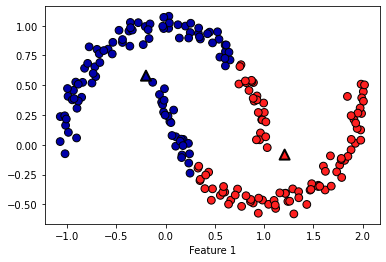

In [50]:
from sklearn.datasets import make_moons
X,y=make_moons(random_state=0,n_samples=200,noise=0.05)
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
y_pred=kmeans.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap=mglearn.cm2,edgecolor="black",linewidth=1,s=60)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           marker="^",c=[mglearn.cm2(0),mglearn.cm2(1)],s=100,linewidth=2,
            cmap=mglearn.cm3,edgecolor="black")
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people,
                                                    stratify=y_people, random_state=0)
nmf=NMF(n_components=100,random_state=0,max_iter=10000)
nmf.fit(X_train)
pca=PCA(n_components=100,random_state=0)
pca.fit(X_train)
kmeans=KMeans(n_clusters=100,random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca=pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans=kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf=np.dot(nmf.transform(X_test),nmf.components_)

Text(0, 0.5, 'nmf')

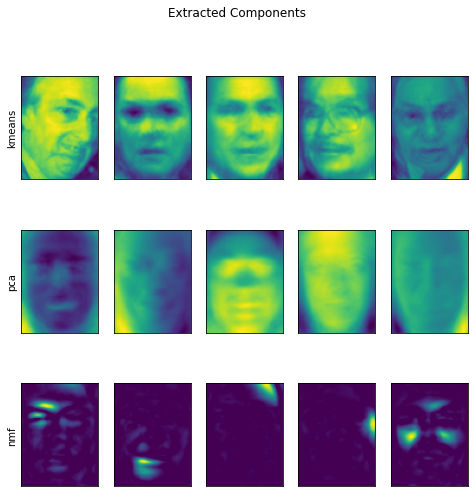

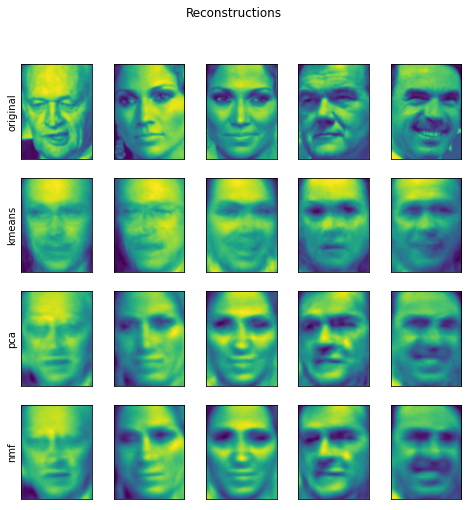

In [55]:
fig,axes=plt.subplots(3,5,figsize=(8,8), subplot_kw={"xticks":(),"yticks":()})
fig.suptitle("Extracted Components")

for ax,comp_kmeans,comp_pca,comp_nmf in zip(axes.T,kmeans.cluster_centers_,
                                            pca.components_,nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image.shape))
    ax[1].imshow(comp_pca.reshape(image.shape),cmap="viridis")
    ax[2].imshow(comp_nmf.reshape(image.shape))
axes[0,0].set_ylabel("kmeans")
axes[1,0].set_ylabel("pca")
axes[2,0].set_ylabel("nmf")

fig,axes=plt.subplots(4,5,figsize=(8,8), subplot_kw={"xticks":(),"yticks":()})
fig.suptitle("Reconstructions")

for ax,orig,rec_kmeans,rec_pca,rec_nmf in zip(axes.T,X_test,X_reconstructed_kmeans,
                                            X_reconstructed_pca,X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image.shape))
    ax[1].imshow(rec_kmeans.reshape(image.shape))
    ax[2].imshow(rec_pca.reshape(image.shape))
    ax[3].imshow(rec_nmf.reshape(image.shape))
    
axes[0,0].set_ylabel("original")
axes[1,0].set_ylabel("kmeans")
axes[2,0].set_ylabel("pca")
axes[3,0].set_ylabel("nmf")

Cluster memberships:
 [4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


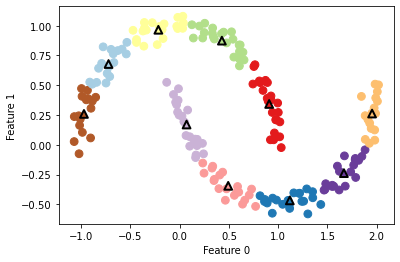

In [58]:
X,y=make_moons(n_samples=200,noise=0.05,random_state=0)
kmeans=KMeans(n_clusters=10,random_state=0)
kmeans.fit(X)
y_pred=kmeans.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred,s=60,cmap="Paired")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=60,
           marker="^",c=range(kmeans.n_clusters),linewidth=2,cmap="Paired",edgecolor="black")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n {}".format(y_pred))

In [59]:
distance_features=kmeans.transform(X)
print(f"Distance features shape: {distance_features.shape}")
print(f"Distance features:\n {distance_features}")

Distance features shape: (200, 10)
Distance features:
 [[1.547 1.034 0.525 ... 1.141 1.125 1.808]
 [2.569 0.508 1.729 ... 0.15  2.276 2.668]
 [0.809 1.359 0.75  ... 1.765 0.719 0.951]
 ...
 [1.13  1.049 0.917 ... 1.509 1.049 1.178]
 [0.909 1.779 0.332 ... 1.983 0.343 1.328]
 [2.511 0.559 1.621 ... 0.048 2.189 2.638]]
